In [231]:
#library section
import pandas as pd #for getting dataframe 
import warnings #warnings are ignored here
import pandas as pd #playing with dataframes
from pandas_profiling import ProfileReport #for getting a quick over view of the data     
warnings.filterwarnings("ignore") #for ignoring the warnings
import seaborn as sns #for visualization
import matplotlib.pyplot as plt #for visualization
import numpy as np #working on numerical arrays
from statsmodels.stats.weightstats import ztest,zconfint #to get the statistical understanding
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder,StandardScaler
import category_encoders as ce
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
sm = SMOTE(random_state=2)
import re

# Problem Statement

All bank branches across India provide MUDRA loans. Such loans have created the low-cost credit concept for micro and small businesses. One of the leading financial institutions in India wants to leverage Machine Learning techniques to determine the client’s loan repayment abilities and take proactive steps to reduce the magnitude of exposure to default.

Goal: The goal of the problem is to predict whether a client will default on the loan payment or not, given the recent data of all the loan transactions. This can help the institution to distinguish future applicants who might default. For each ID in the Test Dataset, you must predict the “Default” level.

# Business Understanding

- To understand that the client will repay the loan or not (classificaton)
- To understand the small and micro business and extimate that they will repay or not
- To reduce the magnitude of exposure to default

# Data Understanding

***Features ->	Description***
***
ID ->	Id of the Applicant.
***
Date_Of_Disbursement ->	The Date when the Loan is Disbursed.
***
Business	-> Type of Business. Existing or New.
***
Jobs_Reatained ->	The total number of Jobs Retained by the business.
***
Jobs_Created  ->	The total number of Jobs Created by the business. 
***
Year_Of_Commitment ->	Fiscal year of commitment.
***
Guaranteed_Approved _Loan ->	The Guaranteed Amount of Loan that has been approved by the Financial Company. 
***
Borrower_Name ->	The Name of the borrower.
***
Low_Documentation_Loan->	Whether the Documentation is low or not? 
***
Demography ->	Whether the borrower belongs to urban or rural locality?
***
State_Of_Bank ->	The State of the Bank which has approved the Loan
***
ChargedOff_Amount  ->	The Amount that has been charged off
***
Borrower_City->	The City where the borrower lives. 
***
Borrower_State->	The State where the borrower lives. 
***
Gross_Amount_Balance->	The Gross amount that has been outstanding in the Loan. 
***
Count_Employees	->The total number of employees in the business. 
***
Classification_Code ->	North American Industry Classification Code. 
***
Loan_Approved_Gross ->	Application process day 
***
Gross_Amount_Disbursed ->  	The total Loan Amount that has been disbursed. 
***
Loan_Term ->	The total Loan term in months. 
***
Commitment_Date ->The date when the SBA commitment is issued. 
***
Primary_Loan_Digit ->	The Primary Key Identifier of the Loan Account.
***
Code_Franchise ->	The Franchise Code.
***
Name_Of_Bank ->	The Name of the Bank that has approved the Loan. 
***
Revolving_Credit_Line ->	Revolving Line of Credit. (Yes/No)
***
Default ->	Defaulted or Not Defaulted - 0-Not Defaulted, 1- Defaulted***


In [2]:
df = pd.read_csv("training_data.csv")  #importing the training dataset
df_test = pd.read_csv("testing_data.csv") #importing the testing dataset

In [128]:

df_test_copy = pd.read_csv("testing_data.csv") #importing the testing dataset

In [129]:
df_test_copy.shape

(45000, 25)

In [5]:
# df_copy = pd.concat([df_train,df_test])

In [6]:
# df = pd.concat([df_train,df_test])

In [7]:
df_copy = df.copy()

In [8]:
df.shape

(105000, 26)

In [9]:
df_test.shape

(45000, 25)

In [10]:
def DataFrameSummary(x): 
    df  = pd.DataFrame(index=x.columns) #initializing the dataframe
    listt = []
    null_list = []
    for i in range(0,x.shape[1]):
        listt.append([x[i].dtype for i in x.columns][i]) #taking the datatype of column 
        null_list.append(x.isnull().sum()[i]) #taking the null count of each column
    df['Data_Type'] = listt  
    df['Null_Count'] = null_list
    df['Duplicates'] = x.duplicated().sum()
    return df  

In [11]:
#getting the overview of the data by printing head and tail
DataFrameSummary(df)

,Data_Type,Null_Count,Duplicates
ID,int64,0,0
Date_Of_Disbursement,object,235,0
Business,object,15,0
Jobs_Reatained,int64,0,0
Jobs_Created,int64,0,0
Year_Of_Commitment,object,0,0
Guaranteed_Approved _Loan,object,0,0
Borrower_Name,object,3,0
Low_Documentation_Loan,object,367,0
Demography,object,0,0


In [12]:
#getting the overview of the data by printing head and tail
DataFrameSummary(df_test)

,Data_Type,Null_Count,Duplicates
ID,int64,0,0
Date_Of_Disbursement,object,108,0
Business,object,6,0
Jobs_Reatained,int64,0,0
Jobs_Created,int64,0,0
Year_Of_Commitment,object,0,0
Guaranteed_Approved _Loan,object,0,0
Borrower_Name,object,2,0
Low_Documentation_Loan,object,133,0
Demography,object,0,0


**Observations** 

- The shape data is 105000 rows and 26 columns
- Need to do some data cleaning ex :- 10/31/2007 0:00 not in a date format
- We have 105000 rows 
- target 




In [13]:
#getting the overview of the data by printing head and tail
df.head()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,0,31-Jul-91,Existing,0,0,1991,Rs.33121600.0,STANDARD PARTS CORPORATION,No,Undefined,AP,Rs.0.0,Mumbai,Maharashtra,Rs.0.0,38,0,Rs.40640000.0,Rs.40640000.0,126,2-Apr-91,4419763001,1,Axis Bank Ltd.,No,0
1,1,30-Apr-06,New,0,6,2006,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,TR,Rs.38283367.68,Delhi,Delhi,Rs.0.0,6,451120,Rs.43647360.0,Rs.43647360.0,123,10-Apr-06,1709796003,1,Bandhan Bank Ltd.,0,1
2,2,30-Jun-04,Existing,4,0,2004,Rs.1422400.0,TELECOMMQC L L C,No,Urban,AS,Rs.0.0,Bengaluru,Karnataka,Rs.0.0,4,541618,Rs.2844800.0,Rs.5961400.32,90,25-May-04,7464754008,1,CSB Bank Limited,Yes,0
3,3,31-Jan-06,New,9,1,2006,Rs.2032000.0,"K & A AUTOMOTIVE, INC. DBA MUF",No,Urban,BR,Rs.0.0,Ahmedabad,Gujarat,Rs.0.0,7,811112,Rs.4064000.0,Rs.4064000.0,126,21-Dec-05,1588745006,0,City Union Bank Ltd.,Yes,0
4,4,31-Dec-04,Existing,4,0,2005,Rs.22981920.0,SUNBEAM DELI,No,Urban,TR,Rs.22862519.68,Hyderabad,Telangana,Rs.0.0,4,722211,Rs.30642560.0,Rs.30642560.0,104,2-Nov-04,8037734002,1,DCB Bank Ltd.,0,1


- Standard deviation is high for all the columns


In [14]:
df.info() #for checkng the missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         105000 non-null  int64 
 1   Date_Of_Disbursement       104765 non-null  object
 2   Business                   104985 non-null  object
 3   Jobs_Reatained             105000 non-null  int64 
 4   Jobs_Created               105000 non-null  int64 
 5   Year_Of_Commitment         105000 non-null  object
 6   Guaranteed_Approved _Loan  105000 non-null  object
 7   Borrower_Name              104997 non-null  object
 8   Low_Documentation_Loan     104633 non-null  object
 9   Demography                 105000 non-null  object
 10  State_Of_Bank              105000 non-null  object
 11  ChargedOff_Amount          105000 non-null  object
 12  Borrower_City              105000 non-null  object
 13  Borrower_State             105000 non-null  

In [15]:
df.isna().sum()/df.shape[0]

ID                           0.000000
Date_Of_Disbursement         0.002238
Business                     0.000143
Jobs_Reatained               0.000000
Jobs_Created                 0.000000
Year_Of_Commitment           0.000000
Guaranteed_Approved _Loan    0.000000
Borrower_Name                0.000029
Low_Documentation_Loan       0.003495
Demography                   0.000000
State_Of_Bank                0.000000
ChargedOff_Amount            0.000000
Borrower_City                0.000000
Borrower_State               0.000000
Gross_Amount_Balance         0.000000
Count_Employees              0.000000
Classification_Code          0.000000
Loan_Approved_Gross          0.000000
Gross_Amount_Disbursed       0.000000
Loan_Term                    0.000000
Commitment_Date              0.000000
Primary_Loan_Digit           0.000000
Code_Franchise               0.000000
Name_Of_Bank                 0.000000
Revolving_Credit_Line        0.004676
Default                      0.000000
dtype: float

we have missing values from the given data we are dropping them because as the percentage of na values per column is so less that it will not effect the end accuracy

In [16]:
df_test.isna().sum()/df.shape[0]

ID                           0.000000
Date_Of_Disbursement         0.001029
Business                     0.000057
Jobs_Reatained               0.000000
Jobs_Created                 0.000000
Year_Of_Commitment           0.000000
Guaranteed_Approved _Loan    0.000000
Borrower_Name                0.000019
Low_Documentation_Loan       0.001267
Demography                   0.000000
State_Of_Bank                0.000000
ChargedOff_Amount            0.000000
Borrower_City                0.000000
Borrower_State               0.000467
Gross_Amount_Balance         0.000000
Count_Employees              0.000000
Classification_Code          0.000000
Loan_Approved_Gross          0.000000
Gross_Amount_Disbursed       0.000000
Loan_Term                    0.000000
Commitment_Date              0.000000
Primary_Loan_Digit           0.000000
Code_Franchise               0.000000
Name_Of_Bank                 0.000000
Revolving_Credit_Line        0.131667
dtype: float64

In [17]:
DataFrameSummary(df_test)

,Data_Type,Null_Count,Duplicates
ID,int64,0,0
Date_Of_Disbursement,object,108,0
Business,object,6,0
Jobs_Reatained,int64,0,0
Jobs_Created,int64,0,0
Year_Of_Commitment,object,0,0
Guaranteed_Approved _Loan,object,0,0
Borrower_Name,object,2,0
Low_Documentation_Loan,object,133,0
Demography,object,0,0


In [18]:
df.columns = df.columns.str.replace(" ","")
df_test.columns = df_test.columns.str.replace(" ","")

In [19]:
df.dropna(inplace=True)
df_test.dropna(inplace=True)

Great! we can see any null value so we are good to go ahead

In [20]:
df.describe() #printing the overview of the data to understand standard deviation,mean,q1,q2,q3

,ID,Jobs_Reatained,Jobs_Created,Count_Employees,Classification_Code,Loan_Term,Primary_Loan_Digit,Code_Franchise,Default
count,103894.000000,103894.000000,103894.000000,103894.000000,103894.000000,103894.000000,1.038940e+05,103894.000000,103894.000000
mean,52514.169192,12.784136,10.462731,9.908156,406231.541311,156.553227,4.651749e+09,2704.827189,0.277494
std,30306.037949,271.976472,271.773392,58.365218,260294.561487,116.563135,2.547706e+09,12655.470977,0.447765
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000034e+09,0.000000,0.000000
25%,26275.250000,0.000000,0.000000,2.000000,236115.000000,90.000000,2.465519e+09,0.000000,0.000000
50%,52525.500000,1.000000,0.000000,4.000000,447110.000000,126.000000,4.105144e+09,1.000000,0.000000
75%,78753.750000,4.000000,1.000000,9.000000,561790.000000,180.000000,6.738794e+09,1.000000,1.000000
max,104999.000000,8800.000000,8800.000000,7200.000000,928120.000000,692.000000,9.996003e+09,92006.000000,1.000000


In [21]:
df_test.describe()

,ID,Jobs_Reatained,Jobs_Created,Count_Employees,Classification_Code,Loan_Term,Primary_Loan_Digit,Code_Franchise
count,30904.000000,30904.000000,30904.000000,30904.000000,30904.000000,30904.000000,3.090400e+04,30904.000000
mean,127498.698518,14.191949,11.966962,10.478870,384471.897230,148.511520,4.418162e+09,2027.675447
std,12967.013663,300.320858,300.299532,88.815304,260954.128983,111.752306,2.508281e+09,11063.207364
min,105000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000534e+09,0.000000
25%,116293.750000,0.000000,0.000000,2.000000,233210.000000,82.000000,2.313492e+09,0.000000
50%,127527.500000,1.000000,0.000000,4.000000,444190.000000,126.000000,3.767345e+09,1.000000
75%,138737.250000,4.000000,1.000000,9.000000,541940.000000,180.000000,6.237226e+09,1.000000
max,149995.000000,8800.000000,8800.000000,8999.000000,928120.000000,758.000000,9.994813e+09,91350.000000


The standard deviation is moving far away from there mean 

In [22]:
df.dtypes

ID                           int64
Date_Of_Disbursement        object
Business                    object
Jobs_Reatained               int64
Jobs_Created                 int64
Year_Of_Commitment          object
Guaranteed_Approved_Loan    object
Borrower_Name               object
Low_Documentation_Loan      object
Demography                  object
State_Of_Bank               object
ChargedOff_Amount           object
Borrower_City               object
Borrower_State              object
Gross_Amount_Balance        object
Count_Employees              int64
Classification_Code          int64
Loan_Approved_Gross         object
Gross_Amount_Disbursed      object
Loan_Term                    int64
Commitment_Date             object
Primary_Loan_Digit           int64
Code_Franchise               int64
Name_Of_Bank                object
Revolving_Credit_Line       object
Default                      int64
dtype: object


**Data Visualization**

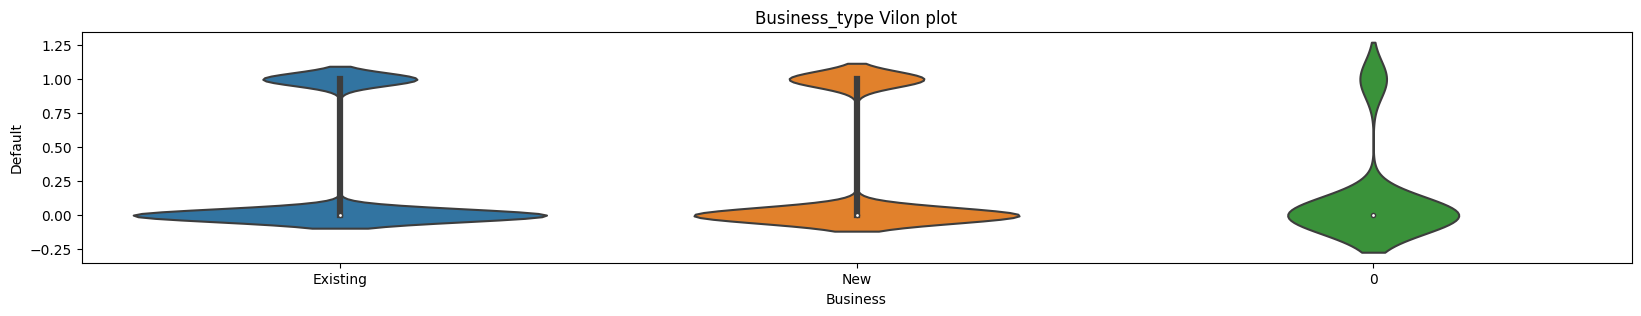

In [23]:
plt.figure(figsize=(20,3))
sns.violinplot(x='Business',y='Default',data=df).set_title("Business_type Vilon plot")
plt.show()

In [24]:
pd.crosstab(df["Business"],df["Default"])

Default,0,1
Business,,
0,90,14
Existing,54176,20199
New,20798,8617


In [25]:
df[["Business"]].value_counts()

Business
Existing    74375
New         29415
0             104
dtype: int64

**Existing** and **New** were having high density of default rate than the non default

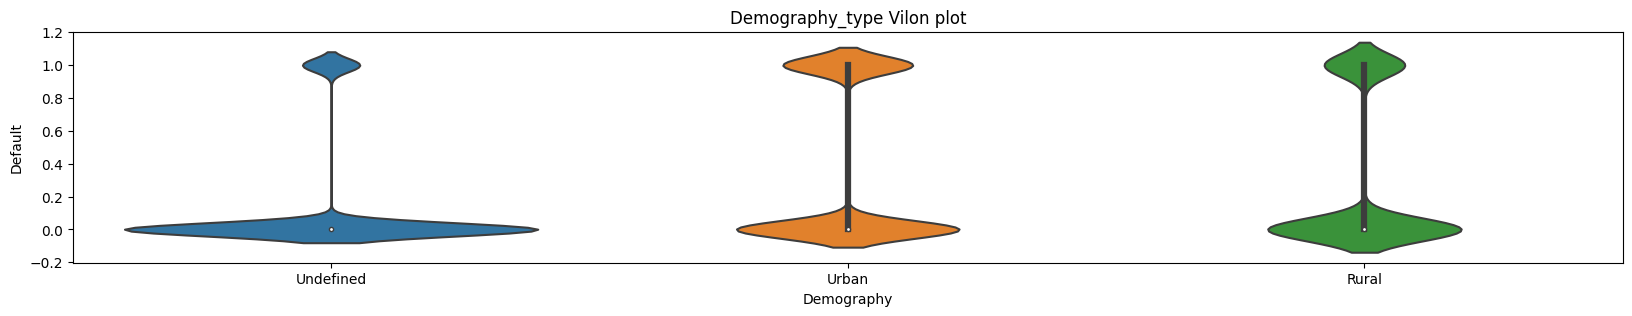

In [26]:
plt.figure(figsize=(20,3))
sns.violinplot(x='Demography',y='Default',data=df).set_title("Demography_type Vilon plot")
plt.show()

In [27]:
df[df['Year_Of_Commitment']=='1976A'] #we are converting this value to 1976

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved_Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
27638,27638,18-Dec-76,New,0,0,1976A,Rs.2048256.0,"RUSSELL HYDROCULTURE, INC.",No,Undefined,AS,Rs.920170.88,Ambikapur,Chhattisgarh,Rs.0.0,2,0,Rs.2275840.0,Rs.2275840.0,362,24-Sep-76,8458641009,0,Telangana Grameena Bank,No,1
41631,41631,2-Aug-76,Existing,0,0,1976A,Rs.36576000.0,GILA VALLEY BLOCK CO (SUB),No,Undefined,TR,Rs.29346306.56,Ahmedabad,Gujarat,Rs.0.0,20,0,Rs.40640000.0,Rs.40640000.0,180,21-Jul-76,8273621007,0,Madhya Pradesh Gramin Bank,No,1
103681,103681,15-Sep-76,Existing,0,0,1976A,Rs.10972800.0,"JUSTIN TYME,INC.",No,Undefined,JH,Rs.7074367.36,Sagar,Madhya Pradesh,Rs.0.0,9,0,Rs.12192000.0,Rs.12192000.0,153,20-Aug-76,7799101004,0,CSB Bank Limited,No,1


In [28]:
df['Year_Of_Commitment']=df['Year_Of_Commitment'].replace('1976A','1976')
df_test['Year_Of_Commitment']=df_test['Year_Of_Commitment'].replace('1976A','1976')

In [29]:
df[df['Year_Of_Commitment']=='1976A'] #we are converting this value to 1976

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved_Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default


In [30]:
df['Loan_Term'] = df["Loan_Term"].astype("int64")
df_test['Loan_Term'] = df_test["Loan_Term"].astype("int64")

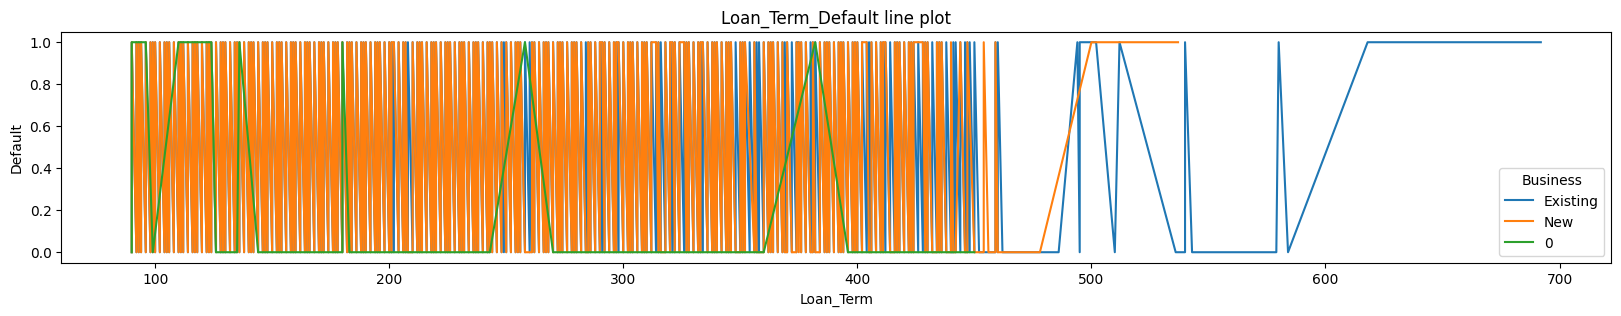

In [31]:
#removing the estimators
plt.figure(figsize=(20,3))
sns.lineplot(x='Loan_Term',y='Default',hue = 'Business',estimator=None , data=df[df['Loan_Term']>=90]).set_title("Loan_Term_Default line plot")
plt.show()

Client who's were having high loan term were having less chances to default and are having high chances to play in the market.

In [32]:
df.columns

Index(['ID', 'Date_Of_Disbursement', 'Business', 'Jobs_Reatained',
       'Jobs_Created', 'Year_Of_Commitment', 'Guaranteed_Approved_Loan',
       'Borrower_Name', 'Low_Documentation_Loan', 'Demography',
       'State_Of_Bank', 'ChargedOff_Amount', 'Borrower_City', 'Borrower_State',
       'Gross_Amount_Balance', 'Count_Employees', 'Classification_Code',
       'Loan_Approved_Gross', 'Gross_Amount_Disbursed', 'Loan_Term',
       'Commitment_Date', 'Primary_Loan_Digit', 'Code_Franchise',
       'Name_Of_Bank', 'Revolving_Credit_Line', 'Default'],
      dtype='object')

In [33]:
df[df['Demography']=='Undefined'].sort_values(by='Guaranteed_Approved_Loan')

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved_Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
78350,78350,31-Oct-92,Existing,0,0,1992,Rs.10013696.0,"SABAKU, INC",No,Undefined,ML,Rs.0.0,Anantapur,Andhra Pradesh,Rs.0.0,3,541430,Rs.12517120.0,Rs.12517120.0,324,25-Aug-92,4987393006,1,IDBI Bank Limited,No,0
48360,48360,31-Jul-94,Existing,0,0,1994,Rs.10013696.0,WALKER LOGGING,No,Undefined,TR,Rs.0.0,Vijapur,Gujarat,Rs.0.0,3,0,Rs.12517120.0,Rs.12517120.0,126,19-Jul-94,7317933007,1,Equitas Small Finance Bank Ltd,No,0
56280,56280,31-Jan-95,Existing,0,0,1995,Rs.10013696.0,KONRADY LAWN & LANDSCAPING,No,Undefined,HR,Rs.0.0,Nizamabad,Telangana,Rs.0.0,14,0,Rs.11379200.0,Rs.11135360.0,327,27-Oct-94,7717303005,1,Aryavart Bank,No,0
54484,54484,31-Jan-93,Existing,0,0,1992,Rs.10013696.0,"HOME FURNITURE OUTLET, INC.",No,Undefined,TR,Rs.0.0,Saharanpur,Uttar Pradesh,Rs.0.0,4,0,Rs.12517120.0,Rs.12517120.0,126,25-Sep-92,5068933006,1,Airtel Payments Bank Ltd,No,0
70645,70645,31-Jul-94,Existing,0,0,1993,Rs.10013696.0,WEST END CAR WASH,No,Undefined,MP,Rs.0.0,Paramakudi,Tamil Nadu,Rs.0.0,5,0,Rs.11379200.0,Rs.11379200.0,270,14-Oct-92,5159843009,1,Bank of Nova Scotia,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96793,96793,30-Apr-94,Existing,0,0,1994,Rs.9997440.0,JOHNNY RANDALL & PAULA M TRIGG,No,Undefined,NL,Rs.0.0,Jharsuguda,Odisha,Rs.0.0,2,112320,Rs.13329920.0,Rs.13329920.0,270,1-Nov-93,6031173004,1,HDFC Bank Ltd,No,0
7973,7973,16-Aug-89,Existing,8,30,1989,Rs.9997440.0,BETTER FLOORS & RESTORATIONS,No,Undefined,TR,Rs.0.0,Pilibhit,Uttar Pradesh,Rs.0.0,34,561740,Rs.9997440.0,Rs.9997440.0,360,18-Apr-89,3425883004,0,Suryoday Small Finance Bank Ltd.,No,0
93268,93268,11-Aug-99,Existing,5,5,1999,Rs.9997440.0,"TERRA TRUCKING CO., INC.",No,Undefined,TR,Rs.0.0,Soro,Odisha,Rs.0.0,4,0,Rs.9997440.0,Rs.9997440.0,360,29-Apr-99,2916064001,1,Central Bank of India,No,0
3916,3916,13-Sep-95,Existing,3,1,1994,Rs.9997440.0,PHILLIP T. & LORI L. RACH,No,Undefined,PB,Rs.0.0,Kurnool,Andhra Pradesh,Rs.0.0,4,0,Rs.9997440.0,Rs.9997440.0,360,16-Nov-93,6057223004,1,Australia and New Zealand Banking Group Ltd.,No,0


In [35]:
df[df['Demography']=='Urban'].sort_values(by='Guaranteed_Approved_Loan')

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved_Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
60999,60999,30-Apr-04,Existing,5,0,2004,Rs.10003536.0,JUMPSTART FITNESS INC,No,Urban,TR,Rs.0.0,Giridih,Jharkhand,Rs.0.0,4,713940,Rs.13338048.0,Rs.13338048.0,180,22-Apr-04,7378164001,1,Shinhan Bank,0,0
23135,23135,11-Dec-02,Existing,0,38,2001,Rs.100055680.0,"THOMAS HACKER ARCHITECTS, INC.",No,Urban,KL,Rs.0.0,Jamshedpur,Jharkhand,Rs.0.0,50,541310,Rs.100055680.0,Rs.100055680.0,360,30-Jul-01,4742904002,1,Manipur Rural Bank,No,0
61673,61673,31-Jan-09,New,2,13,2009,Rs.10009632.0,"KaJo Enterprises, LLC",No,Urban,JH,Rs.9711090.56,Ratlam,Madhya Pradesh,Rs.0.0,2,722211,Rs.13346176.0,Rs.13346176.0,168,16-Dec-08,3285515009,0,Dhanlaxmi Bank Ltd.,No,1
37700,37700,16-Aug-06,Existing,0,25,2006,Rs.100136960.0,CASA FURNISHINGS INC,No,Urban,UP,Rs.0.0,Sahibganj,Jharkhand,Rs.0.0,4,442110,Rs.100136960.0,Rs.100136960.0,360,19-May-06,2050106001,1,ESAF Small Finance Bank Ltd.,0,0
33033,33033,30-Sep-09,Existing,1,0,2009,Rs.10014508.8,"MVR TIMBER CUTTING, INC.",No,Urban,AP,Rs.0.0,Bettiah,Bihar,Rs.0.0,1,113310,Rs.11127232.0,Rs.11127232.0,180,31-Aug-09,3605075008,0,"MUFG Bank, Ltd.",No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102914,102914,31-Aug-05,New,0,0,2005,Rs.9997440.0,MAGGIE'S SCRAPBOOKING COMPANY,No,Urban,LD,Rs.9192117.76,Amroha,Uttar Pradesh,Rs.0.0,7,451120,Rs.13329920.0,Rs.13329920.0,99,1-Jun-05,8898214001,1,Bank of America,No,1
71307,71307,30-Sep-04,New,4,4,2004,Rs.9997440.0,"GREENAPPLE, INC. A DELAWARE CO",No,Urban,TR,Rs.0.0,Karimganj,Assam,Rs.0.0,4,722110,Rs.13329920.0,Rs.13329920.0,180,5-May-04,7410034009,83882,Airtel Payments Bank Ltd,0,0
74051,74051,31-Mar-09,New,1,14,2009,Rs.9997440.0,"HACDELLA'S, LLC",No,Urban,MZ,Rs.11729435.52,Sidhpur,Gujarat,Rs.0.0,1,722211,Rs.13329920.0,Rs.13329920.0,100,27-Jan-09,3308725006,71673,Madhya Pradesh Gramin Bank,No,1
92216,92216,30-Sep-01,Existing,2,0,2001,Rs.9997440.0,SCOTT'S AUTOMOTIVE,No,Urban,TR,Rs.2629976.96,Lalitpur,Uttar Pradesh,Rs.0.0,2,811111,Rs.13329920.0,Rs.13329920.0,417,27-Aug-01,4864394002,1,ESAF Small Finance Bank Ltd.,0,1


## Hypothesis Testing

Implementing hypothesis testing on the below questions
1) if the jobs_Created is high then there is a high chances to not default (new technology may evolve)
2) if the loan term is high then there is a high chances to not default
3) if the jobs_Reatained is high then there is high chances to not default

In [36]:
df.columns

Index(['ID', 'Date_Of_Disbursement', 'Business', 'Jobs_Reatained',
       'Jobs_Created', 'Year_Of_Commitment', 'Guaranteed_Approved_Loan',
       'Borrower_Name', 'Low_Documentation_Loan', 'Demography',
       'State_Of_Bank', 'ChargedOff_Amount', 'Borrower_City', 'Borrower_State',
       'Gross_Amount_Balance', 'Count_Employees', 'Classification_Code',
       'Loan_Approved_Gross', 'Gross_Amount_Disbursed', 'Loan_Term',
       'Commitment_Date', 'Primary_Loan_Digit', 'Code_Franchise',
       'Name_Of_Bank', 'Revolving_Credit_Line', 'Default'],
      dtype='object')

In [37]:
df['Default'] = df['Default'].astype("int64")


### If the Loan Term is Greater than 400 months is a high chances to Not default

[]

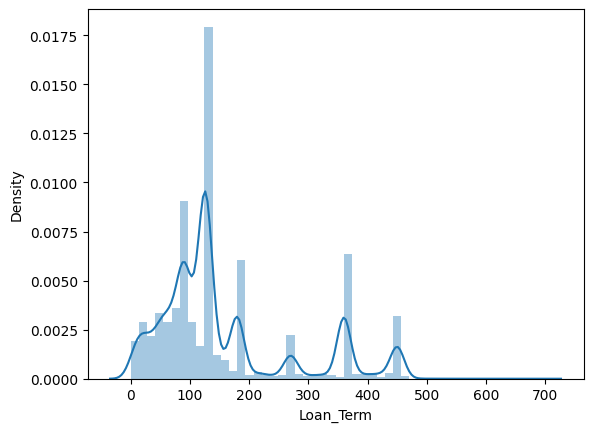

In [38]:
temp = df_copy[df_copy["Loan_Term"].notna()].Loan_Term
sns.distplot(temp)
plt.plot()

Since the data is not normally distributed we can take random 1000 loan samples and get the hypothesis testing done

In [39]:
Non_Default_data = df_copy[df_copy["Default"]==1] #getting all the Non-default data 

In [40]:
Non_Default_data[Non_Default_data["Loan_Term"].notna()].head()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
1,1,30-Apr-06,New,0,6,2006,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,TR,Rs.38283367.68,Delhi,Delhi,Rs.0.0,6,451120,Rs.43647360.0,Rs.43647360.0,123,10-Apr-06,1709796003,1,Bandhan Bank Ltd.,0,1
4,4,31-Dec-04,Existing,4,0,2005,Rs.22981920.0,SUNBEAM DELI,No,Urban,TR,Rs.22862519.68,Hyderabad,Telangana,Rs.0.0,4,722211,Rs.30642560.0,Rs.30642560.0,104,2-Nov-04,8037734002,1,DCB Bank Ltd.,0,1
6,6,10/31/2007 0:00,New,3,3,2007,Rs.1016000.0,"Diffusion Limited, LLC",No,Urban,AS,Rs.2022896.6400000001,Kolkata,West Bengal,Rs.0.0,2,541618,Rs.2032000.0,Rs.7063232.0,96,31-Jul-07,2607855005,0,Dhanlaxmi Bank Ltd.,Yes,1
11,11,31-May-05,Existing,0,0,2005,Rs.406400.0,DARREN DREILING PHOTOGRAPHY,No,Urban,TR,Rs.812718.72,Kanpur,Uttar Pradesh,Rs.0.0,1,541921,Rs.812800.0,Rs.1414190.72,90,17-May-05,8866754005,1,IDFC FIRST Bank Limited,Yes,1
12,12,31-May-09,Existing,1,0,2009,Rs.2032000.0,"J.D. Floorworks, Inc. dba Floo",No,Urban,TR,Rs.511088.64,Nagpur,Maharashtra,Rs.0.0,1,442210,Rs.4064000.0,Rs.8292835.84,75,22-May-09,3435295000,0,Bandhan Bank Ltd.,Yes,1


In [41]:
Non_Default_data[Non_Default_data["Loan_Term"].notna()]

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
1,1,30-Apr-06,New,0,6,2006,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,TR,Rs.38283367.68,Delhi,Delhi,Rs.0.0,6,451120,Rs.43647360.0,Rs.43647360.0,123,10-Apr-06,1709796003,1,Bandhan Bank Ltd.,0,1
4,4,31-Dec-04,Existing,4,0,2005,Rs.22981920.0,SUNBEAM DELI,No,Urban,TR,Rs.22862519.68,Hyderabad,Telangana,Rs.0.0,4,722211,Rs.30642560.0,Rs.30642560.0,104,2-Nov-04,8037734002,1,DCB Bank Ltd.,0,1
6,6,10/31/2007 0:00,New,3,3,2007,Rs.1016000.0,"Diffusion Limited, LLC",No,Urban,AS,Rs.2022896.6400000001,Kolkata,West Bengal,Rs.0.0,2,541618,Rs.2032000.0,Rs.7063232.0,96,31-Jul-07,2607855005,0,Dhanlaxmi Bank Ltd.,Yes,1
11,11,31-May-05,Existing,0,0,2005,Rs.406400.0,DARREN DREILING PHOTOGRAPHY,No,Urban,TR,Rs.812718.72,Kanpur,Uttar Pradesh,Rs.0.0,1,541921,Rs.812800.0,Rs.1414190.72,90,17-May-05,8866754005,1,IDFC FIRST Bank Limited,Yes,1
12,12,31-May-09,Existing,1,0,2009,Rs.2032000.0,"J.D. Floorworks, Inc. dba Floo",No,Urban,TR,Rs.511088.64,Nagpur,Maharashtra,Rs.0.0,1,442210,Rs.4064000.0,Rs.8292835.84,75,22-May-09,3435295000,0,Bandhan Bank Ltd.,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104984,104984,31-Mar-07,New,1,0,2007,Rs.812800.0,Beyond Touring Inc.,No,Urban,GJ,Rs.1609344.0,Mul,Maharashtra,Rs.0.0,1,561520,Rs.1625600.0,Rs.1731264.0,81,22-Mar-07,2346365001,0,ICICI Bank Ltd.,No,1
104988,104988,30-Apr-06,New,17,3,2006,Rs.11785600.0,A LA CARTE INTERIORS INC,No,Urban,DL,Rs.15853338.88,Pavagada,Karnataka,Rs.0.0,15,442110,Rs.23571200.0,Rs.23571200.0,75,6-Apr-06,1629556001,1,Karnataka Bank Ltd.,0,1
104990,104990,31-Jan-95,Existing,0,0,1995,Rs.11338560.0,SURETY INSURANCE AGENCY INC,No,Undefined,KA,Rs.10282488.96,O' Valley,Tamil Nadu,Rs.0.0,11,0,Rs.12598400.0,Rs.12598400.0,104,31-Oct-94,7729803010,1,Shivalik Small Finance Bank Ltd,No,1
104992,104992,30-Sep-04,New,1,3,2004,Rs.1381760.0,DOLLAR DAYZ LLC,No,Urban,AR,Rs.2668991.36,Chhapra,Bihar,Rs.0.0,1,452990,Rs.2763520.0,Rs.3287044.48,24,27-May-04,7475804005,1,CSB Bank Limited,Yes,1


In [42]:
sample_list = []
for i in range(1000): #will take 1000 random sampling distribution of 60 sample values of 60 non default clients
         sample_list_temp = np.random.choice(Non_Default_data[Non_Default_data["Loan_Term"].notna()].Loan_Term,60)
         sample_list.append(sample_list_temp)

In [43]:
mean_h0 = 400
z_test_score,p_value = ztest(sample_list,value=mean_h0,alternative='larger')
print('p_value',p_value)
print('z_test_score',z_test_score)

if (p_value.all()<0.05): #smaller the p_value,stronger the evidence to reject the H0 
      print()
      print("Reject H0 with",(1-p_value)*100,'level of confidence')
      print()
else:
  print("Fall to reject H0")
  print()  

p_value [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
z_test_score [-124.84015687 -145.37291856 -150.6019629  -145.64191747 -139.27003065
 -153.65290708 -144.78274537 -142.92575899 -146.02991887 -128.24176097
 -137.32370632 -137.97070984 -138.83186368 -144.37812981 -129.71004422
 -132.05044231 -139.19296476 -138.89517029 -143.39193076 -139.73017028
 -141.77373212 -142.82841714 -136.68081169 -136.1380981  -135.48745058
 -137.50588634 -143.03016182 -146.65737249 -143.26545354 -147.72708745
 -140.26367377 -141.6269532  -153.20567514 -135.33068984 -144.70153602
 -143.32082214 -130.5460345  -147.16821869 -136.09037058 -141.88524856
 -142.49193902 -135.71225379 -140.47772152 -153.13629465 -136.07138592
 -131.98811006 -146.18514389 -151.43769049 -143.99015297 -140.46057342
 -139.06401696 -137.59306927 -139.2827915  -135.1735775  -142.10950044
 -132.02798837

In [44]:
#confidence interval,value shifts the confidence interval so it is centered at x1_mean_value

lower,upper = zconfint(x1=sample_list,value=0,alpha=0.05,alternative='two-sided')

print("With 95% confidence interval we can say that, clients Mean loan period is in between",sum(lower)/len(lower),"and",sum(upper)/len(upper))
     

With 95% confidence interval we can say that, clients Mean loan period is in between 81.82011100313508 and 90.55805566353156


Conclusion: As per the Z test, we fall to reject H0 and go with the alternate theory which says the Average loan term of non default cilents are < 400 . With a confidence interval of 95%, we can say that the average loan term ranges between **81.9 and 90.7**

## If the Jobs_Created  is greater than 250 then there is high chances to not default

In [45]:
df_copy.columns = df_copy.columns.str.replace(' ', '')

In [46]:
df_copy.columns

Index(['ID', 'Date_Of_Disbursement', 'Business', 'Jobs_Reatained',
       'Jobs_Created', 'Year_Of_Commitment', 'Guaranteed_Approved_Loan',
       'Borrower_Name', 'Low_Documentation_Loan', 'Demography',
       'State_Of_Bank', 'ChargedOff_Amount', 'Borrower_City', 'Borrower_State',
       'Gross_Amount_Balance', 'Count_Employees', 'Classification_Code',
       'Loan_Approved_Gross', 'Gross_Amount_Disbursed', 'Loan_Term',
       'Commitment_Date', 'Primary_Loan_Digit', 'Code_Franchise',
       'Name_Of_Bank', 'Revolving_Credit_Line', 'Default'],
      dtype='object')

[]

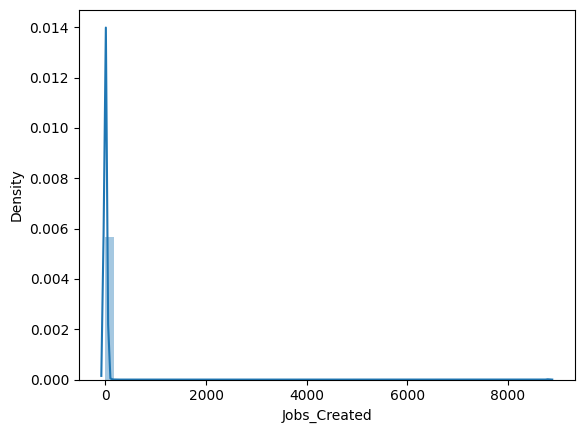

In [47]:
temp = df_copy[df_copy["Jobs_Created"].notna()].Jobs_Created
sns.distplot(temp)
plt.plot()

In [48]:
Non_Default_data = df_copy[df_copy["Default"]==1] #getting all the Non-default data 
Non_Default_data[Non_Default_data['Jobs_Created'].notna()].head()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved_Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
1,1,30-Apr-06,New,0,6,2006,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,TR,Rs.38283367.68,Delhi,Delhi,Rs.0.0,6,451120,Rs.43647360.0,Rs.43647360.0,123,10-Apr-06,1709796003,1,Bandhan Bank Ltd.,0,1
4,4,31-Dec-04,Existing,4,0,2005,Rs.22981920.0,SUNBEAM DELI,No,Urban,TR,Rs.22862519.68,Hyderabad,Telangana,Rs.0.0,4,722211,Rs.30642560.0,Rs.30642560.0,104,2-Nov-04,8037734002,1,DCB Bank Ltd.,0,1
6,6,10/31/2007 0:00,New,3,3,2007,Rs.1016000.0,"Diffusion Limited, LLC",No,Urban,AS,Rs.2022896.6400000001,Kolkata,West Bengal,Rs.0.0,2,541618,Rs.2032000.0,Rs.7063232.0,96,31-Jul-07,2607855005,0,Dhanlaxmi Bank Ltd.,Yes,1
11,11,31-May-05,Existing,0,0,2005,Rs.406400.0,DARREN DREILING PHOTOGRAPHY,No,Urban,TR,Rs.812718.72,Kanpur,Uttar Pradesh,Rs.0.0,1,541921,Rs.812800.0,Rs.1414190.72,90,17-May-05,8866754005,1,IDFC FIRST Bank Limited,Yes,1
12,12,31-May-09,Existing,1,0,2009,Rs.2032000.0,"J.D. Floorworks, Inc. dba Floo",No,Urban,TR,Rs.511088.64,Nagpur,Maharashtra,Rs.0.0,1,442210,Rs.4064000.0,Rs.8292835.84,75,22-May-09,3435295000,0,Bandhan Bank Ltd.,Yes,1


In [49]:
sample_list = []
for i in range(60): #will take 1000 random sampling distribution of 60 sample values of 60 non default clients
         sample_list_temp = np.random.choice(Non_Default_data[Non_Default_data['Jobs_Created'].notna()].Jobs_Created,60)
         sample_list.append(sample_list_temp)

In [50]:
mean_h0 = 500
z_test_score,p_value = ztest(sample_list,value=mean_h0,alternative='larger')
print('p_value',p_value)
print('z_test_score',z_test_score)

if (p_value.all()<0.05): #smaller the p_value,stronger the evidence to reject the H0 
      print()
      print("Reject H0 with",(1-p_value)*100,'level of confidence')
      print()
else:
  print("Fail to reject H0")
  print()  

p_value [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.99182278
 0.99172694 1.         1.         1.         1.         1.
 1.         0.99176877 1.         0.99164945 1.         1.
 0.991781   1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.99175421 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.99172467 1.         1.         1.         1.         1.        ]
z_test_score [-7.23852432e+02 -2.09247110e+03 -1.22167459e+03 -1.77929522e+03
 -1.97101199e+03 -6.25888733e+02 -2.92261743e+03 -1.74654703e+03
 -1.68201498e+03 -1.63794611e+03 -2.33584947e+03 -1.48408080e+03
 -8.37424537e+02 -1.28387341e+03 -6.31425790e+02 -3.16843215e+03
 -7.82244516e+02 -2.40090797e+00 -2.39664106e+00 -8.16968233e+02
 -1.48351337e+02 -4.23449672e+02 -9.33892854e+0

In [51]:
lower,upper = zconfint(x1=sample_list,value=0,alpha=0.05,alternative='two-sided')

In [52]:
print("With 95% confidence interval we can say that, clients Mean jobs creation is in between",sum(lower)/len(lower),"and",sum(upper)/len(upper))

With 95% confidence interval we can say that, clients Mean jobs creation is in between -15.857923153258932 and 53.47403426437005


Conclusion: As per the Z test, we fall to reject H0 and go with the alternate theory which says the Average Job creation of non default cilents whos > 500 . 

With a confidence interval of 95%, we can say that the average job creation ranges between **-8.88310561092432 and 31.85143894425765**

In [53]:
df.describe()

,ID,Jobs_Reatained,Jobs_Created,Count_Employees,Classification_Code,Loan_Term,Primary_Loan_Digit,Code_Franchise,Default
count,103894.000000,103894.000000,103894.000000,103894.000000,103894.000000,103894.000000,1.038940e+05,103894.000000,103894.000000
mean,52514.169192,12.784136,10.462731,9.908156,406231.541311,156.553227,4.651749e+09,2704.827189,0.277494
std,30306.037949,271.976472,271.773392,58.365218,260294.561487,116.563135,2.547706e+09,12655.470977,0.447765
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000034e+09,0.000000,0.000000
25%,26275.250000,0.000000,0.000000,2.000000,236115.000000,90.000000,2.465519e+09,0.000000,0.000000
50%,52525.500000,1.000000,0.000000,4.000000,447110.000000,126.000000,4.105144e+09,1.000000,0.000000
75%,78753.750000,4.000000,1.000000,9.000000,561790.000000,180.000000,6.738794e+09,1.000000,1.000000
max,104999.000000,8800.000000,8800.000000,7200.000000,928120.000000,692.000000,9.996003e+09,92006.000000,1.000000


In [54]:
df.dtypes

ID                           int64
Date_Of_Disbursement        object
Business                    object
Jobs_Reatained               int64
Jobs_Created                 int64
Year_Of_Commitment          object
Guaranteed_Approved_Loan    object
Borrower_Name               object
Low_Documentation_Loan      object
Demography                  object
State_Of_Bank               object
ChargedOff_Amount           object
Borrower_City               object
Borrower_State              object
Gross_Amount_Balance        object
Count_Employees              int64
Classification_Code          int64
Loan_Approved_Gross         object
Gross_Amount_Disbursed      object
Loan_Term                    int64
Commitment_Date             object
Primary_Loan_Digit           int64
Code_Franchise               int64
Name_Of_Bank                object
Revolving_Credit_Line       object
Default                      int64
dtype: object

# Data Preparation

In [55]:
DataFrameSummary(df)

,Data_Type,Null_Count,Duplicates
ID,int64,0,0
Date_Of_Disbursement,object,0,0
Business,object,0,0
Jobs_Reatained,int64,0,0
Jobs_Created,int64,0,0
Year_Of_Commitment,object,0,0
Guaranteed_Approved_Loan,object,0,0
Borrower_Name,object,0,0
Low_Documentation_Loan,object,0,0
Demography,object,0,0


In [56]:
DataFrameSummary(df_test)

,Data_Type,Null_Count,Duplicates
ID,int64,0,0
Date_Of_Disbursement,object,0,0
Business,object,0,0
Jobs_Reatained,int64,0,0
Jobs_Created,int64,0,0
Year_Of_Commitment,object,0,0
Guaranteed_Approved_Loan,object,0,0
Borrower_Name,object,0,0
Low_Documentation_Loan,object,0,0
Demography,object,0,0


In [57]:
df["Commitment_Date"] = df["Commitment_Date"].astype('datetime64[ns]')
df["Date_Of_Disbursement"] = df["Date_Of_Disbursement"].astype('datetime64[ns]')

In [58]:
df["Commitment_Month"] = [i.month for i in df["Commitment_Date"]]
df["Month_Of_Disbursement"] = [i.month for i in df["Date_Of_Disbursement"]]


In [59]:
df_test["Commitment_Date"] = df_test["Commitment_Date"].astype('datetime64[ns]')
df_test["Date_Of_Disbursement"] = df_test["Date_Of_Disbursement"].astype('datetime64[ns]')

In [60]:
df_test["Commitment_Month"] = [i.month for i in df_test["Commitment_Date"]]
df_test["Month_Of_Disbursement"] = [i.month for i in df_test["Date_Of_Disbursement"]]


In [61]:
df=df.drop(["Commitment_Date","Date_Of_Disbursement"],axis=1)
df_test = df_test.drop(["Commitment_Date","Date_Of_Disbursement"],axis=1)

In [62]:
df["Low_Documentation_Loan"].unique()

array(['No', 'Yes', 'S', '0', 'A', 'C', 'R'], dtype=object)

In [63]:
df["Low_Documentation_Loan"]

0          No
1          No
2          No
3          No
4          No
         ... 
104995    Yes
104996    Yes
104997     No
104998     No
104999    Yes
Name: Low_Documentation_Loan, Length: 103894, dtype: object

In [65]:
le = LabelEncoder()
le.fit(df["Low_Documentation_Loan"])
df["Low_Documentation_Loan"] = le.fit_transform(df["Low_Documentation_Loan"])

In [66]:
df["Low_Documentation_Loan"].value_counts()

3    91663
6    11834
0      148
5       95
2       89
1       59
4        6
Name: Low_Documentation_Loan, dtype: int64

In [67]:
df["Low_Documentation_Loan"].unique()

array([3, 6, 5, 0, 1, 2, 4])

In [68]:
le.fit(df_test["Low_Documentation_Loan"])
df_test["Low_Documentation_Loan"] = le.fit_transform(df_test["Low_Documentation_Loan"])

In [69]:
le.fit(df["Demography"])
df["Demography"] = le.fit_transform(df["Demography"])

le.fit(df_test["Demography"])
df_test["Demography"] = le.fit_transform(df_test["Demography"])

In [70]:
le.fit(df["Business"])
df["Business"] = le.fit_transform(df["Business"])

le.fit(df_test["Business"])
df_test["Business"] = le.fit_transform(df_test["Business"])

In [71]:
df_test["Year_Of_Commitment"] = df_test["Year_Of_Commitment"].astype("int32")
df["Year_Of_Commitment"] = df["Year_Of_Commitment"].astype("int32")

In [72]:
df.dropna(inplace=True)
df_test.dropna(inplace=True)

In [73]:
df["Revolving_Credit_Line"].unique()

array(['No', '0', 'Yes', 'T', 'R', '`', '2', '4', '.', '1', 'C'],
      dtype=object)

In [74]:
DataFrameSummary(df_test)

,Data_Type,Null_Count,Duplicates
ID,int64,0,0
Business,int32,0,0
Jobs_Reatained,int64,0,0
Jobs_Created,int64,0,0
Year_Of_Commitment,int32,0,0
Guaranteed_Approved_Loan,object,0,0
Borrower_Name,object,0,0
Low_Documentation_Loan,int32,0,0
Demography,int32,0,0
State_Of_Bank,object,0,0


In [75]:
# df["New_Guaranteed_Approved_Loan"]=empty_list
# df.pop("Guaranteed_Approved_Loan")

In [76]:
df_copy["Gross_Amount_Balance"].isnull().sum()

0

In [77]:
empty_list=[]
for i in df.Gross_Amount_Balance:
    empty_list.append(int(float(i[3:]))) 
    
df["Gross_Amount_Balance"]=empty_list 

# df.pop("Gross_Amount_Balance")

In [78]:
empty_list=[]
for i in df_test.Gross_Amount_Balance:
    empty_list.append(int(float(i[3:]))) 
    
df_test["Gross_Amount_Balance"]=empty_list 

In [79]:
empty_list=[]
for i in df.Loan_Approved_Gross:
    empty_list.append(int(float(i[3:]))) 
    
df["Loan_Approved_Gross"]=empty_list 

# df.pop("Loan_Approved_Gross")

In [80]:
empty_list=[]
for i in df_test.Loan_Approved_Gross:
    empty_list.append(int(float(i[3:]))) 
    
df_test["Loan_Approved_Gross"]=empty_list 

# df.pop("Loan_Approved_Gross")

In [81]:
empty_list=[]
for i in df.Gross_Amount_Disbursed:
    empty_list.append(int(float(i[3:]))) 
    
df["Gross_Amount_Disbursed"]=empty_list 

# df.pop("Gross_Amount_Disbursed")

In [82]:
empty_list=[]
for i in df_test.Gross_Amount_Disbursed:
    empty_list.append(int(float(i[3:]))) 
    
df_test["Gross_Amount_Disbursed"]=empty_list 

# df.pop("Gross_Amount_Disbursed")

In [83]:
empty_list=[]
for i in df.Guaranteed_Approved_Loan:
    empty_list.append(int(float(i[3:]))) 
    
df["Guaranteed_Approved_Loan"]=empty_list



In [84]:
empty_list=[]
for i in df_test.Guaranteed_Approved_Loan:
    empty_list.append(int(float(i[3:]))) 
    
df_test["Guaranteed_Approved_Loan"]=empty_list

In [85]:

empty_list=[]
for i in df_test.ChargedOff_Amount:
    empty_list.append(int(float(i[3:]))) 
    
df_test["ChargedOff_Amount"]=empty_list

In [86]:
empty_list=[]
for i in df.ChargedOff_Amount:
    empty_list.append(int(float(i[3:]))) 
    
df["ChargedOff_Amount"]=empty_list

In [87]:
DataFrameSummary(df_test)

,Data_Type,Null_Count,Duplicates
ID,int64,0,0
Business,int32,0,0
Jobs_Reatained,int64,0,0
Jobs_Created,int64,0,0
Year_Of_Commitment,int32,0,0
Guaranteed_Approved_Loan,int64,0,0
Borrower_Name,object,0,0
Low_Documentation_Loan,int32,0,0
Demography,int32,0,0
State_Of_Bank,object,0,0


In [88]:
le.fit(df["State_Of_Bank"])
df["State_Of_Bank"] = le.fit_transform(df["State_Of_Bank"])

le.fit(df_test["State_Of_Bank"])
df_test["State_Of_Bank"] = le.fit_transform(df_test["State_Of_Bank"])

In [89]:
le.fit(df["Borrower_City"])
df["Borrower_City"] = le.fit_transform(df["Borrower_City"])

le.fit(df_test["Borrower_City"])
df_test["Borrower_City"] = le.fit_transform(df_test["Borrower_City"])

In [90]:
le.fit(df["Borrower_State"])
df["Borrower_State"] = le.fit_transform(df["Borrower_State"])

le.fit(df_test["Borrower_State"])
df_test["Borrower_State"] = le.fit_transform(df_test["Borrower_State"])

In [91]:
le.fit(df["Revolving_Credit_Line"])
df["Revolving_Credit_Line"] = le.fit_transform(df["Revolving_Credit_Line"])

le.fit(df_test["Revolving_Credit_Line"])
df_test["Revolving_Credit_Line"] = le.fit_transform(df_test["Revolving_Credit_Line"])

In [92]:
le.fit(df["Name_Of_Bank"])
df["Name_Of_Bank"] = le.fit_transform(df["Name_Of_Bank"])

le.fit(df_test["Name_Of_Bank"])
df_test["Name_Of_Bank"] = le.fit_transform(df_test["Name_Of_Bank"])

In [93]:
le.fit(df["Borrower_Name"])
df["Borrower_Name"] = le.fit_transform(df["Borrower_Name"])

le.fit(df_test["Borrower_Name"])
df_test["Borrower_Name"] = le.fit_transform(df_test["Borrower_Name"])

<AxesSubplot:>

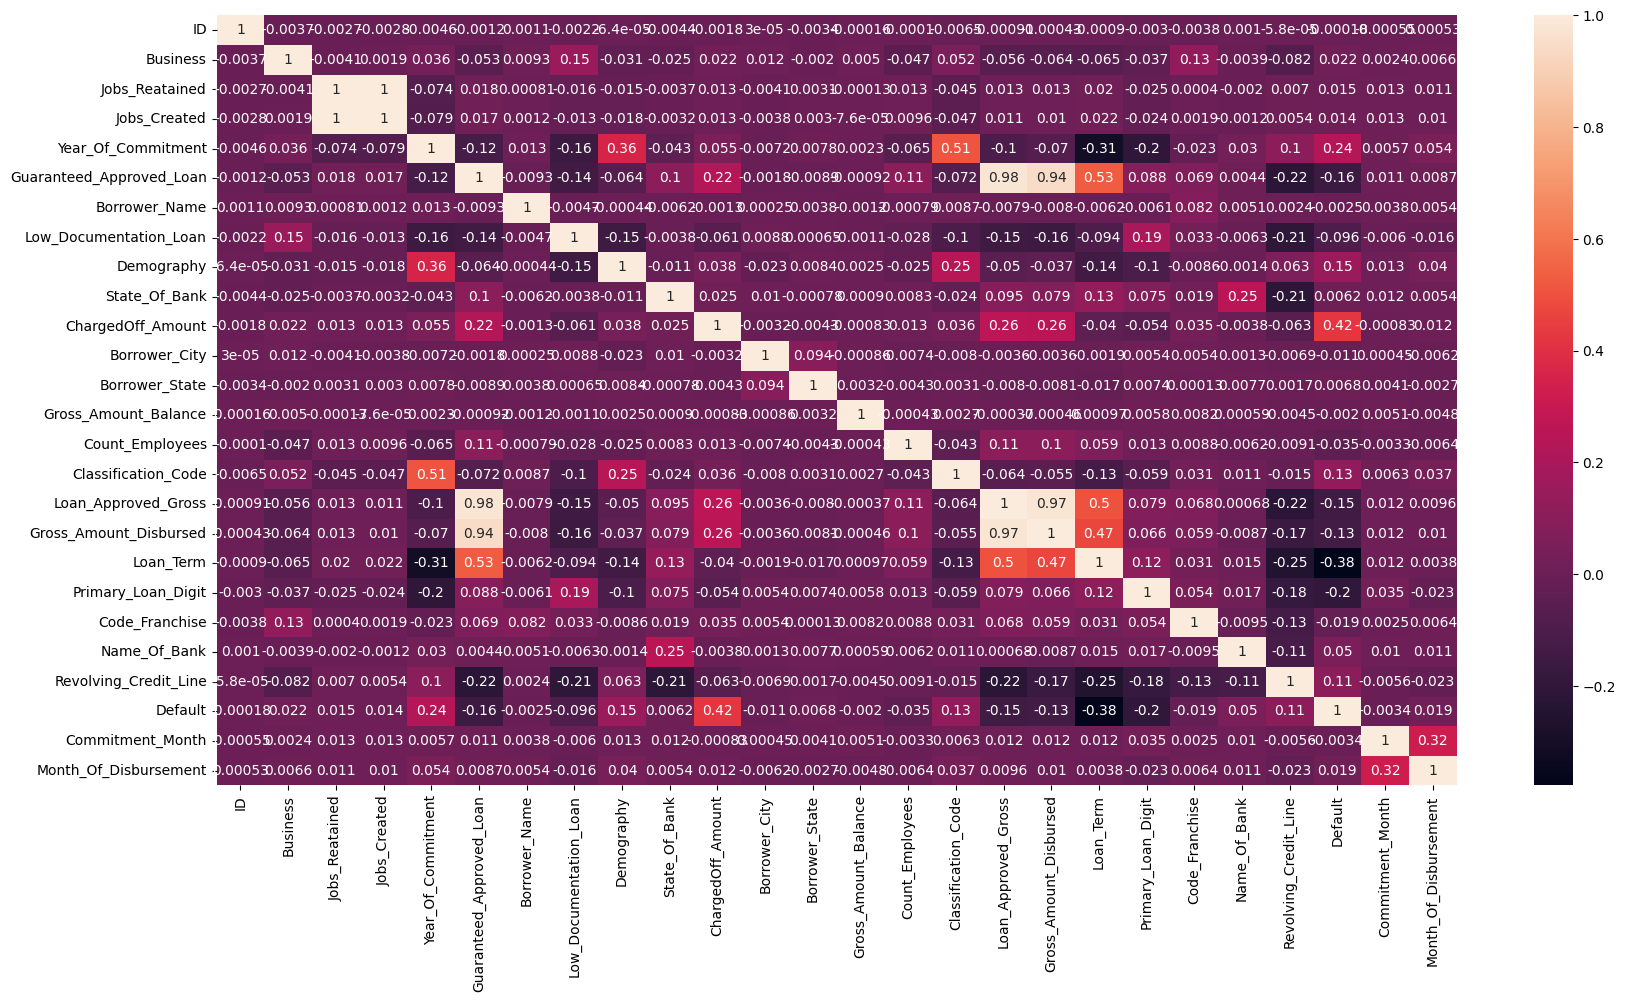

In [94]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [95]:
#printing the top 5 best correlation values 
s = df.corr().stack()
s.sort_values(ascending=False)[25::2].head(10)

Month_Of_Disbursement     Month_Of_Disbursement     1.000000
Jobs_Created              Jobs_Reatained            0.997098
Guaranteed_Approved_Loan  Loan_Approved_Gross       0.975394
Gross_Amount_Disbursed    Loan_Approved_Gross       0.973121
Guaranteed_Approved_Loan  Gross_Amount_Disbursed    0.942615
                          Loan_Term                 0.528668
Year_Of_Commitment        Classification_Code       0.506738
Loan_Approved_Gross       Loan_Term                 0.504651
Gross_Amount_Disbursed    Loan_Term                 0.469723
Default                   ChargedOff_Amount         0.421095
dtype: float64

In [96]:
#printing the top 5 best correlation values 
s = df.corr().stack()
s.sort_values(ascending=True)[25::2].head(10)

Gross_Amount_Disbursed    Low_Documentation_Loan   -0.160180
Guaranteed_Approved_Loan  Default                  -0.160087
Loan_Approved_Gross       Low_Documentation_Loan   -0.150001
Demography                Low_Documentation_Loan   -0.148924
Loan_Approved_Gross       Default                  -0.145106
Loan_Term                 Demography               -0.140634
Guaranteed_Approved_Loan  Low_Documentation_Loan   -0.136571
Default                   Gross_Amount_Disbursed   -0.133903
Loan_Term                 Classification_Code      -0.128340
Code_Franchise            Revolving_Credit_Line    -0.126198
dtype: float64

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

# Modelling

In [97]:
s = setup(df, target='Default')

,Description,Value
0,session_id,5751
1,Target,Default
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(103894, 26)"
5,Missing Values,False
6,Numeric Features,22
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [98]:
best_model = compare_models()
     

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9946,0.9979,0.9954,0.9947,0.9946,0.9866,0.9867,6.2640
catboost,CatBoost Classifier,0.9946,0.9983,0.9954,0.9947,0.9946,0.9866,0.9866,13.7120
rf,Random Forest Classifier,0.9945,0.9971,0.9953,0.9946,0.9946,0.9864,0.9865,3.0160
gbc,Gradient Boosting Classifier,0.9945,0.9983,0.9951,0.9945,0.9945,0.9863,0.9863,8.3490
ada,Ada Boost Classifier,0.9943,0.9978,0.9948,0.9944,0.9943,0.9858,0.9859,2.2560
lightgbm,Light Gradient Boosting Machine,0.9940,0.9973,0.9949,0.9941,0.9940,0.9852,0.9852,0.6280
dt,Decision Tree Classifier,0.9889,0.9853,0.9853,0.9889,0.9889,0.9722,0.9722,0.3430
et,Extra Trees Classifier,0.9842,0.9958,0.9766,0.9842,0.9842,0.9603,0.9605,5.1790
lr,Logistic Regression,0.9816,0.9933,0.9706,0.9817,0.9815,0.9536,0.9540,2.1490
nb,Naive Bayes,0.9646,0.9849,0.9389,0.9656,0.9639,0.9084,0.9113,0.1170


In [99]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [100]:
DataFrameSummary(df_test)

,Data_Type,Null_Count,Duplicates
ID,int64,0,0
Business,int32,0,0
Jobs_Reatained,int64,0,0
Jobs_Created,int64,0,0
Year_Of_Commitment,int32,0,0
Guaranteed_Approved_Loan,int64,0,0
Borrower_Name,int32,0,0
Low_Documentation_Loan,int32,0,0
Demography,int32,0,0
State_Of_Bank,int32,0,0


In [125]:
df_test_copy.shape

(45000, 25)

In [130]:
df_test_copy.columns

Index(['ID', 'Date_Of_Disbursement', 'Business', 'Jobs_Reatained',
       'Jobs_Created ', 'Year_Of_Commitment ', 'Guaranteed_Approved _Loan',
       'Borrower_Name ', 'Low_Documentation_Loan', 'Demography',
       'State_Of_Bank', 'ChargedOff_Amount ', 'Borrower_City',
       'Borrower_State', 'Gross_Amount_Balance', 'Count_Employees',
       'Classification_Code ', 'Loan_Approved_Gross',
       'Gross_Amount_Disbursed  ', 'Loan_Term', 'Commitment_Date',
       'Primary_Loan_Digit', 'Code_Franchise', 'Name_Of_Bank',
       'Revolving_Credit_Line'],
      dtype='object')

In [136]:
df_test_copy['Commitment_Date'] = df_test_copy['Commitment_Date'].astype('datetime64[ns]')
df_test_copy['Commitment_Month'] = [i.month for i in df_test_copy['Commitment_Date']]

In [145]:
df_test_copy['Date_Of_Disbursement'] = df_test_copy['Date_Of_Disbursement'].astype('datetime64[ns]')
df_test_copy['Month_Of_Disbursement'] = [i.month for i in df_test_copy['Date_Of_Disbursement']]

In [142]:
df_test_copy.columns

Index(['ID', 'Date_Of_Disbursement', 'Business', 'Jobs_Reatained',
       'Jobs_Created', 'Year_Of_Commitment', 'Guaranteed_Approved_Loan',
       'Borrower_Name', 'Low_Documentation_Loan', 'Demography',
       'State_Of_Bank', 'ChargedOff_Amount', 'Borrower_City', 'Borrower_State',
       'Gross_Amount_Balance', 'Count_Employees', 'Classification_Code',
       'Loan_Approved_Gross', 'Gross_Amount_Disbursed', 'Loan_Term',
       'Commitment_Date', 'Primary_Loan_Digit', 'Code_Franchise',
       'Name_Of_Bank', 'Revolving_Credit_Line', 'Commitment_Month'],
      dtype='object')

In [141]:
df_test_copy.columns = df_test_copy.columns.str.replace(" ","")

In [151]:
df_test_copy["Business"] = [str(i) for i in df_test_copy["Business"]]

In [152]:
le.fit(df_test_copy["Business"])
df_test_copy["Business"] = le.fit_transform(df_test_copy["Business"])

In [196]:
df_test_copy.dtypes

ID                                   int64
Date_Of_Disbursement        datetime64[ns]
Business                             int32
Jobs_Reatained                       int64
Jobs_Created                         int64
Year_Of_Commitment                   int32
Guaranteed_Approved_Loan             int64
Borrower_Name                        int32
Low_Documentation_Loan               int32
Demography                           int32
State_Of_Bank                        int32
ChargedOff_Amount                    int64
Borrower_City                        int32
Borrower_State                       int32
Gross_Amount_Balance                 int64
Count_Employees                      int64
Classification_Code                  int64
Loan_Approved_Gross                  int64
Gross_Amount_Disbursed               int64
Loan_Term                            int64
Commitment_Date             datetime64[ns]
Primary_Loan_Digit                   int64
Code_Franchise                       int64
Name_Of_Ban

In [178]:
df_test_copy.shape

(45000, 27)

In [157]:
empty_list=[]
for i in df_test_copy.Gross_Amount_Balance:
    empty_list.append(int(float(i[3:]))) 
    
df_test_copy["Gross_Amount_Balance"]=empty_list 

# df.pop("Gross_Amount_Balance")

In [159]:
empty_list=[]
for i in df_test_copy.ChargedOff_Amount:
    empty_list.append(int(float(i[3:]))) 
    
df_test_copy["ChargedOff_Amount"]=empty_list 

# df.pop("Gross_Amount_Balance")

In [163]:
empty_list=[]
for i in df_test_copy.Guaranteed_Approved_Loan:
    empty_list.append(int(float(i[3:]))) 
    
df_test_copy["Guaranteed_Approved_Loan"]=empty_list 

# df.pop("Gross_Amount_Balance")

In [165]:
empty_list=[]
for i in df_test_copy.Gross_Amount_Disbursed:
    empty_list.append(int(float(i[3:]))) 
    
df_test_copy["Gross_Amount_Disbursed"]=empty_list 

# df.pop("Gross_Amount_Balance")

In [167]:
empty_list=[]
for i in df_test_copy.Loan_Approved_Gross:
    empty_list.append(int(float(i[3:]))) 
    
df_test_copy["Loan_Approved_Gross"]=empty_list 

# df.pop("Gross_Amount_Balance")

In [174]:
df_test_copy["Borrower_Name"] = [str(i) for i in df_test_copy["Borrower_Name"]]

In [175]:
le.fit(df_test_copy["Borrower_Name"])
df_test_copy["Borrower_Name"] = le.fit_transform(df_test_copy["Borrower_Name"])


In [179]:

le.fit(df_test_copy["Year_Of_Commitment"])
df_test_copy["Year_Of_Commitment"] = le.fit_transform(df_test_copy["Year_Of_Commitment"])


In [182]:
df_test_copy["Low_Documentation_Loan"] = [str(i) for i in df_test_copy["Low_Documentation_Loan"]]

le.fit(df_test_copy["Low_Documentation_Loan"])
df_test_copy["Low_Documentation_Loan"] = le.fit_transform(df_test_copy["Low_Documentation_Loan"])


In [186]:
df_test_copy["Name_Of_Bank"] = [str(i) for i in df_test_copy["Name_Of_Bank"]]

le.fit(df_test_copy["Name_Of_Bank"])
df_test_copy["Name_Of_Bank"] = le.fit_transform(df_test_copy["Name_Of_Bank"])


In [188]:
df_test_copy["Demography"] = [str(i) for i in df_test_copy["Demography"]]

le.fit(df_test_copy["Demography"])
df_test_copy["Demography"] = le.fit_transform(df_test_copy["Demography"])


In [190]:
df_test_copy["State_Of_Bank"] = [str(i) for i in df_test_copy["State_Of_Bank"]]

le.fit(df_test_copy["State_Of_Bank"])
df_test_copy["State_Of_Bank"] = le.fit_transform(df_test_copy["State_Of_Bank"])


In [192]:
df_test_copy["Borrower_City"] = [str(i) for i in df_test_copy["Borrower_City"]]

le.fit(df_test_copy["Borrower_City"])
df_test_copy["Borrower_City"] = le.fit_transform(df_test_copy["Borrower_City"])


In [195]:
df_test_copy["Borrower_State"] = [str(i) for i in df_test_copy["Borrower_State"]]

le.fit(df_test_copy["Borrower_State"])
df_test_copy["Borrower_State"] = le.fit_transform(df_test_copy["Borrower_State"])


In [197]:
df_test_copy["Revolving_Credit_Line"] = [str(i) for i in df_test_copy["Revolving_Credit_Line"]]

le.fit(df_test_copy["Revolving_Credit_Line"])
df_test_copy["Revolving_Credit_Line"] = le.fit_transform(df_test_copy["Revolving_Credit_Line"])


In [143]:
df_test_copy.columns = ['ID', 'Business', 'Jobs_Reatained', 'Jobs_Created',
       'Year_Of_Commitment', 'Guaranteed_Approved_Loan', 'Borrower_Name',
       'Low_Documentation_Loan', 'Demography', 'State_Of_Bank',
       'ChargedOff_Amount', 'Borrower_City', 'Borrower_State',
       'Gross_Amount_Balance', 'Count_Employees', 'Classification_Code',
       'Loan_Approved_Gross', 'Gross_Amount_Disbursed', 'Loan_Term',
       'Primary_Loan_Digit', 'Code_Franchise', 'Name_Of_Bank',
       'Revolving_Credit_Line', 'Commitment_Month', 'Month_Of_Disbursement']

ValueError: Length mismatch: Expected axis has 26 elements, new values have 25 elements

In [154]:
df_test_copy['Year_Of_Commitment']=df_test_copy['Year_Of_Commitment'].replace('1976A','1976')

In [169]:
df_test_copy

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved_Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Commitment_Month,Month_Of_Disbursement
0,105000,2006-03-31,1,19,0,2006,4064000,Diversified Display Products o,No,Urban,...,8128000,9403852,57,2006-03-09,1702825000,0,ICICI Bank Ltd.,Yes,3,3.0
1,105001,1995-01-31,1,0,0,1995,1463040,"FOOTE CONSULTING GROUP, INC.",Yes,Undefined,...,1625600,1625600,90,1994-12-14,7908833003,1,South Indian Bank Ltd.,No,12,1.0
2,105002,2006-09-30,1,7,5,2006,812800,INTEGRATED COMERCIAL ENTERPRIS,No,Urban,...,1625600,3450336,81,2006-08-25,2361626001,1,IDBI Bank Limited,Yes,8,9.0
3,105003,2000-07-31,2,2,0,2000,2032000,FIRST IN RESCUE EQUIPMENT,No,Urban,...,4064000,6916196,18,2000-06-28,3814664008,1,Aryavart Bank,Yes,6,7.0
4,105004,2005-06-30,1,0,0,2005,23469600,"GLASGOW AUTOMOTIVE, INC.",No,Rural,...,31292800,31292800,219,2005-05-02,8830244003,1,Paschim Banga Gramin Bank,No,5,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,149995,2005-11-30,1,3,1,2005,1625600,ULTIMATE COMPUTERS,No,Urban,...,3251200,2291852,81,2005-09-29,9135674006,1,Saurashtra Gramin Bank,Yes,9,11.0
44996,149996,2002-07-31,1,12,0,2002,29657040,"MARK A. HENKE, D>M.D., P.C.",No,Urban,...,39542720,36292170,180,2002-06-27,5494234007,1,Uttarbanga Kshetriya Gramin Bank,NaN,6,7.0
44997,149997,2008-08-13,1,0,15,2008,60878720,"ARTHUR J DEBAISE M.D., P.A.",No,Urban,...,60878720,60878720,360,2008-04-15,3225006003,1,Aryavart Bank,NaN,4,8.0
44998,149998,2003-02-28,1,2,0,2003,2032000,CHO & SONS CORP,No,Urban,...,4064000,4064000,90,2003-01-24,6047584010,1,Au Small Finance Bank Ltd.,NaN,1,2.0


In [198]:
csv=predict_model(best_model, data=df_test_copy)     

In [199]:
csv.shape

(45000, 29)

In [200]:
CSV=csv[["ID",'Label']]

In [201]:
CSV.columns = ["ID","Default"]

In [202]:
CSV.shape

(45000, 2)

In [204]:
CSV.to_csv('Outt.csv', index=False)

In [124]:
CSV.shape

(40605, 2)

In [ ]:
CSV.dropna(inplace=True)

In [108]:
DataFrameSummary(csv)

,Data_Type,Null_Count,Duplicates
ID,float64,9701,9395
Business,float64,9701,9395
Jobs_Reatained,float64,9701,9395
Jobs_Created,float64,9701,9395
Year_Of_Commitment,float64,9701,9395
Guaranteed_Approved_Loan,float64,9701,9395
Borrower_Name,float64,9701,9395
Low_Documentation_Loan,float64,9701,9395
Demography,float64,9701,9395
State_Of_Bank,float64,9701,9395


In [109]:
csv.columns

Index(['ID', 'Business', 'Jobs_Reatained', 'Jobs_Created',
       'Year_Of_Commitment', 'Guaranteed_Approved_Loan', 'Borrower_Name',
       'Low_Documentation_Loan', 'Demography', 'State_Of_Bank',
       'ChargedOff_Amount', 'Borrower_City', 'Borrower_State',
       'Gross_Amount_Balance', 'Count_Employees', 'Classification_Code',
       'Loan_Approved_Gross', 'Gross_Amount_Disbursed', 'Loan_Term',
       'Primary_Loan_Digit', 'Code_Franchise', 'Name_Of_Bank',
       'Revolving_Credit_Line', 'Commitment_Month', 'Month_Of_Disbursement',
       'Label', 'Score'],
      dtype='object')

In [207]:
best_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=5751, reg_alpha=0, ...)

In [208]:
save_model(best_model, 'XGBClassifier')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Default',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                gamma=0, gpu_id=-1, grow_policy='depthwise',
                                importance_type=None, interaction_constraints='',
                                learning_rate=0.300000012, max_bin=256,
                                max_cat_to_

In [209]:
model = load_model('XGBClassifier')

Transformation Pipeline and Model Successfully Loaded


In [210]:
model

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Default',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_del

In [211]:
x = df.drop("Default",axis=1)
y = df["Default"]

In [212]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [213]:
x_test

,ID,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved_Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,...,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Commitment_Month,Month_Of_Disbursement
49195,49195,2,0,0,2003,8636000,2103,6,0,32,...,444130,10160000,10160000,180,6022804008,1560,84,1,1,9
71142,71142,1,0,0,1979,28212288,55732,3,1,16,...,0,31699200,31699200,216,2643542004,0,8,6,4,7
18606,18606,1,1,0,2007,426720,14208,3,0,2,...,484110,853440,2247310,44,2242495000,0,26,9,1,4
77180,77180,1,0,0,2000,8473440,6990,6,2,1,...,0,11297920,11297920,126,3790414008,1,19,1,6,7
27621,27621,2,0,0,2000,7589520,26400,3,0,1,...,0,10119360,10119360,270,3705574006,1,94,6,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40219,40219,2,0,1,2005,1727200,28277,3,2,11,...,484220,2032000,2032000,108,1435555007,0,115,6,8,9
95454,95454,1,6,0,2007,4064000,99611,3,2,11,...,722110,8128000,10972800,126,2171795009,0,57,8,12,12
61565,61565,2,2,1,2008,406400,44518,3,2,11,...,238210,812800,860917,40,2836345009,0,57,9,11,4
49826,49826,1,45,30,1993,81280000,96279,3,1,12,...,541110,81280000,81280000,360,5701853002,1,68,6,5,1


In [215]:
x = df.drop("Default",axis=1)
y = df["Default"]

In [216]:
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size=0.2)

In [217]:
X_resampled, y_resampled = SMOTE().fit_resample(x_train,y_train)

In [218]:
y_resampled.value_counts()

0    60051
1    60051
Name: Default, dtype: int64

In [219]:
# Instantiate the new Logistic Regression
log_reg_2 = LogisticRegression()

# Fit the model with the data that has been resampled with SMOTE
log_reg_2.fit(X_resampled, y_resampled)

# Predict on the test set (not resampled to obtain honest evaluation)
preds2 = log_reg_2.predict(x_test)


In [220]:
preds2

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [221]:
tn, fp, fn, tp = confusion_matrix(y_test,preds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

True negatives:  14930 
False positives:  83 
False negatives:  186 
True positives:  5580


# Evaluation

In [222]:
confusion_matrix(y_test, preds2)

array([[14930,    83],
       [  186,  5580]], dtype=int64)

The 145 wrong prediction from the above observations

In [223]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(83115, 25)
(20779, 25)
(83115,)
(20779,)


In [224]:
from sklearn.ensemble import GradientBoostingClassifier

In [225]:
# Instantiate the new xgboost
log_reg_2 = XGBClassifier()

# Fit the model with the data that has been resampled with SMOTE
log_reg_2.fit(X_resampled, y_resampled)

# Predict on the test set (not resampled to obtain honest evaluation)
preds2 = log_reg_2.predict(x_test)


In [226]:
tn, fp, fn, tp = confusion_matrix(y_test,preds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

True negatives:  14909 
False positives:  104 
False negatives:  22 
True positives:  5744


In [227]:
# Instantiate the new xgboost
log_reg_2 = GradientBoostingClassifier()

# Fit the model with the data that has been resampled with SMOTE
log_reg_2.fit(X_resampled, y_resampled)

# Predict on the test set (not resampled to obtain honest evaluation)
preds2 = log_reg_2.predict(x_test)

tn, fp, fn, tp = confusion_matrix(y_test,preds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

True negatives:  14910 
False positives:  103 
False negatives:  20 
True positives:  5746


In [236]:
#standardization
scale= StandardScaler()

 
# standardization of dependent variables
scaled_data = scale.fit_transform(x) 
print(scaled_data)

[[-1.73280394 -0.62382015 -0.04700479 ...  0.22875914 -0.74463056
   0.18111166]
 [-1.73277094  1.58733508 -0.04700479 ... -1.45153146 -0.74463056
  -0.69154043]
 [-1.73273794 -0.62382015 -0.03229757 ...  1.2369335  -0.44711739
  -0.10977237]
 ...
 [ 1.73176987  1.58733508 -0.02494395 ...  0.22875914 -1.33965691
  -0.98242445]
 [ 1.73180287 -0.62382015 -0.04700479 ... -1.45153146 -1.63717008
  -0.4006564 ]
 [ 1.73183586  1.58733508 -0.04700479 ... -1.45153146  0.7429353
   1.63553181]]


In [237]:
x_train,x_test,y_train,y_test = train_test_split(scaled_data,y,stratify=y,test_size=0.2)

In [238]:
# Instantiate the new xgboost
log_reg_2 = XGBClassifier()

# Fit the model with the data that has been resampled with SMOTE
log_reg_2.fit(x_train, y_train)

# Predict on the test set (not resampled to obtain honest evaluation)
preds2 = log_reg_2.predict(x_test)


In [239]:
tn, fp, fn, tp = confusion_matrix(y_test,preds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

True negatives:  14916 
False positives:  97 
False negatives:  20 
True positives:  5746


# Deployement